In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')

# View first few rows of data
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
import pandas as pd

# read csv file with no header
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', header=None, names=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type'])

# print first few rows to check if it's working
print(df.head())

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


<AxesSubplot:>

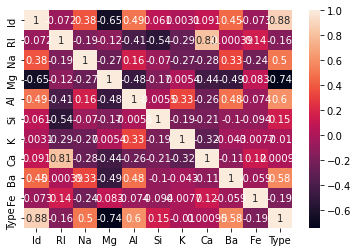

In [4]:
# Check for missing values
df.isnull().sum()

# Check data types and summary statistics
df.info()
df.describe()

# Check distribution of target variable
sns.countplot(x='Type', data=df)

# Check correlation among variables
sns.heatmap(df.corr(), annot=True)

In [5]:
# Split data into features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KNN accuracy: 0.9538461538461539
Decision Tree accuracy: 0.9692307692307692
Random Forest accuracy: 0.9846153846153847
SVM accuracy: 0.8


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

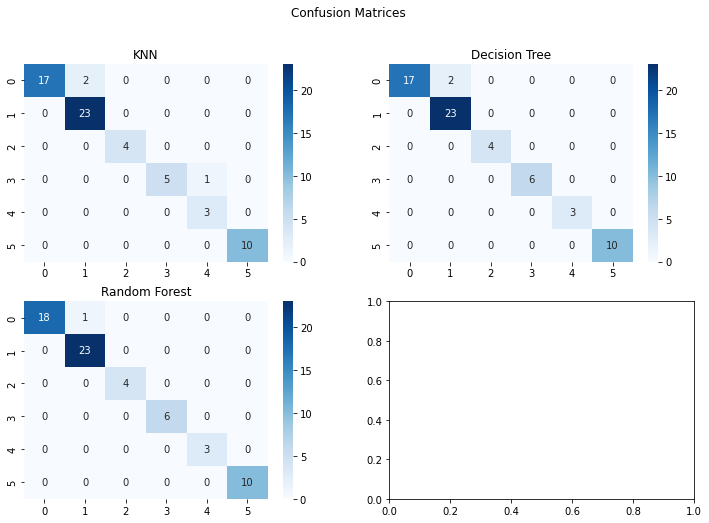

In [6]:
# Import classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize classifiers
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Train classifiers on training data
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Make predictions on testing data
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate performance using accuracy score
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Print accuracy scores
print("KNN accuracy:", acc_knn)
print("Decision Tree accuracy:", acc_dt)
print("Random Forest accuracy:", acc_rf)
print("SVM accuracy:", acc_svm)

# Evaluate performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrices
plt.figure(figsize=(12, 8))
plt.suptitle("Confusion Matrices")
plt.subplot(2, 2, 1)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
plt.title("KNN")
plt.subplot(2, 2, 2)
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g')
plt.title("Decision Tree")
plt.subplot(2, 2, 3)
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
plt.title("Random Forest")
plt.subplot(2, 2, 4)
sns.heatmap

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# Divide the data into features and labels
X = df.drop(['Type'], axis=1)
y = df['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_matrix)

Accuracy: 0.8604651162790697
Confusion matrix:
 [[11  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  2  1  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  1  0  1  1  0]
 [ 0  0  0  0  1  7]]


In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

